In [1]:
import pandas as pd
df_user = pd.read_csv('fakedata.csv')
df_card = pd.read_csv('card.csv')

df_user.shape, df_card.shape

((10000, 42), (52, 20))

In [2]:
df_card['Cluster'].value_counts()

1    12
6     9
2     7
3     7
7     6
0     6
4     4
5     1
Name: Cluster, dtype: int64

In [3]:
import random

card_num = []
for _ in range(10000):
    num = random.randint(0, 7)
    card_num.append(num)
    
df_user['card'] = card_num

In [4]:
df_user.head()

,이름,고유번호,관심사,나이,성별,혜택,교통비,교통횟수,교통총비용,편의점비,...,야구비,야구횟수,야구총비용,놀이공원/공연비,놀이공원/공연횟수,놀이공원/공연총비용,통신비,통신횟수,통신총비용,card
0,서성수,a00001,쇼핑,19,여,넷플릭스,500,10,5000,24500,...,15600,2,31200,33600,1,33600,45500,1,45500,2
1,박은서,a00002,카페,14,남,영화관람,600,19,11400,21600,...,10800,1,10800,30600,0,0,33000,1,33000,6
2,안영수,a00003,여행,12,여,영화관람,600,46,27600,43100,...,24700,1,24700,46200,0,0,58900,1,58900,4
3,이정희,a00004,게임,8,여,야구,300,60,18000,33700,...,18300,2,36600,32600,1,32600,17500,1,17500,0
4,서유진,a00005,패션,19,여,통신비,700,32,22400,32200,...,11200,2,22400,30800,1,30800,32000,1,32000,6


In [5]:
# df_user.to_csv('total.csv', index=False)

In [6]:
# eda?

In [7]:
df_user['혜택'].value_counts(), df_user['관심사'].value_counts()

(영화관람    874
 야구      856
 배달      847
 통신비     839
 넷플릭스    835
 대중교통    834
 뷰티      833
 편의점     824
 쇼핑      822
 놀이동산    818
 카페      810
 도서      808
 Name: 혜택, dtype: int64,
 스포츠     1163
 여행      1145
 도서      1135
 뷰티      1124
 카페      1109
 게임      1104
 영화관람    1096
 쇼핑      1069
 패션      1055
 Name: 관심사, dtype: int64)

In [8]:
df_user['혜택'] = df_user['혜택'].astype('category')
df_user['관심사'] = df_user['관심사'].astype('category')

# df_user['card'] = df_user['card'].astype('object')

In [9]:
# LightGBM과 CatBoost는 pandas의 category 타입 가능
# XGBoost는 오직 numeric 데이터 타입만 가능 → XGBoost에서는 category 변수들을 따로 전처리 해줘야 함 예) 원핫인코딩, 레이블인코딩

df_user.columns

Index(['이름', '고유번호', '관심사', '나이', '성별', '혜택', '교통비', '교통횟수', '교통총비용', '편의점비',
       '편의점횟수', '편의점총비용', '배달비', '배달횟수', '배달총비용', '카페비', '카페횟수', '카페총비용',
       'ott비', 'ott횟수', 'ott총비용', '영화비', '영화횟수', '영화총비용', '쇼핑비', '쇼핑횟수',
       '쇼핑총비용', '도서비', '도서횟수', '도서총비용', '뷰티비', '뷰티횟수', '뷰티총비용', '야구비', '야구횟수',
       '야구총비용', '놀이공원/공연비', '놀이공원/공연횟수', '놀이공원/공연총비용', '통신비', '통신횟수', '통신총비용',
       'card'],
      dtype='object')

In [10]:
df_user = df_user[['이름', '고유번호', '관심사', '나이', '혜택', '교통총비용',
                  '편의점총비용', '배달총비용', '카페총비용', 'ott총비용', 
                  '영화총비용', '쇼핑총비용', '도서총비용', '뷰티총비용',
                  '야구총비용', '놀이공원/공연총비용', '통신총비용', 'card']]
df_user.head()

,이름,고유번호,관심사,나이,혜택,교통총비용,편의점총비용,배달총비용,카페총비용,ott총비용,영화총비용,쇼핑총비용,도서총비용,뷰티총비용,야구총비용,놀이공원/공연총비용,통신총비용,card
0,서성수,a00001,쇼핑,19,넷플릭스,5000,539000,174300,118000,4400,69300,87800,24000,192500,31200,33600,45500,2
1,박은서,a00002,카페,14,영화관람,11400,604800,36600,360000,17000,40500,14900,95500,47800,10800,0,33000,6
2,안영수,a00003,여행,12,영화관람,27600,301700,84500,54900,10800,40200,34900,25500,89500,24700,0,58900,4
3,이정희,a00004,게임,8,야구,18000,101100,226400,268600,28800,17000,29000,83700,41600,36600,32600,17500,0
4,서유진,a00005,패션,19,통신비,22400,289800,78900,187200,0,70200,221500,21300,189200,22400,30800,32000,6


In [11]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   이름          10000 non-null  object  
 1   고유번호        10000 non-null  object  
 2   관심사         10000 non-null  category
 3   나이          10000 non-null  int64   
 4   혜택          10000 non-null  category
 5   교통총비용       10000 non-null  int64   
 6   편의점총비용      10000 non-null  int64   
 7   배달총비용       10000 non-null  int64   
 8   카페총비용       10000 non-null  int64   
 9   ott총비용      10000 non-null  int64   
 10  영화총비용       10000 non-null  int64   
 11  쇼핑총비용       10000 non-null  int64   
 12  도서총비용       10000 non-null  int64   
 13  뷰티총비용       10000 non-null  int64   
 14  야구총비용       10000 non-null  int64   
 15  놀이공원/공연총비용  10000 non-null  int64   
 16  통신총비용       10000 non-null  int64   
 17  card        10000 non-null  int64   
dtypes: category(2), int64(14), object(2)
memory usa

## 데이터 분할

In [12]:
feature_names = df_user.columns.to_list()
feature_names.remove('card')
feature_names.remove('이름')
feature_names.remove('고유번호')
feature_names

['관심사',
 '나이',
 '혜택',
 '교통총비용',
 '편의점총비용',
 '배달총비용',
 '카페총비용',
 'ott총비용',
 '영화총비용',
 '쇼핑총비용',
 '도서총비용',
 '뷰티총비용',
 '야구총비용',
 '놀이공원/공연총비용',
 '통신총비용']

In [13]:
label_name = 'card'

X = df_user[feature_names] # 전체 데이터 1000개
y = df_user[label_name]

X.shape, y.shape

((10000, 15), (10000,))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 15), (2000, 15), (8000,), (2000,))

In [15]:
y_train.value_counts()

2    1043
4    1011
3    1005
1     998
0     995
5     989
6     986
7     973
Name: card, dtype: int64

In [16]:
## 분류
num_classes = 8

In [17]:
import lightgbm as lgbm
import numpy as np

model = lgbm.LGBMClassifier(random_state=42, n_jobs=-1, num_class=num_classes, objective='multiclass')
model

LGBMClassifier(num_class=8, objective='multiclass', random_state=42)

In [18]:
n_estimators = np.random.randint(10, 50, 10)
n_estimators

array([39, 39, 12, 20, 27, 35, 41, 44, 37, 39])

In [19]:
learning_rate = np.random.uniform(0.01, 0.2, 10)
learning_rate

array([0.12705748, 0.1619895 , 0.11360597, 0.02816598, 0.04930031,
       0.08390758, 0.09688895, 0.19666677, 0.05512685, 0.05266037])

In [20]:
max_depth = np.random.randint(3, 20, 5)
max_depth

array([ 8, 11, 18,  6,  8])

In [21]:
params = {'n_estimators': n_estimators,
          'learning_rate': learning_rate,
          'max_depth': max_depth}
params

{'n_estimators': array([39, 39, 12, 20, 27, 35, 41, 44, 37, 39]),
 'learning_rate': array([0.12705748, 0.1619895 , 0.11360597, 0.02816598, 0.04930031,
        0.08390758, 0.09688895, 0.19666677, 0.05512685, 0.05266037]),
 'max_depth': array([ 8, 11, 18,  6,  8])}

In [22]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(num_class=8, objective='multiclass',
                                            random_state=42),
                   param_distributions={'learning_rate': array([0.12705748, 0.1619895 , 0.11360597, 0.02816598, 0.04930031,
       0.08390758, 0.09688895, 0.19666677, 0.05512685, 0.05266037]),
                                        'max_depth': array([ 8, 11, 18,  6,  8]),
                                        'n_estimators': array([39, 39, 12, 20, 27, 35, 41, 44, 37, 39])},
                   scoring='accuracy')

In [23]:
best_model = clf.best_estimator_
best_model

LGBMClassifier(learning_rate=0.09688895218784283, max_depth=8, n_estimators=44,
               num_class=8, objective='multiclass', random_state=42)

In [24]:
clf.best_score_

0.13587500000000002

In [25]:
clf.best_params_

{'n_estimators': 44, 'max_depth': 8, 'learning_rate': 0.09688895218784283}

In [26]:
y_pred = clf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.114

<Axes: >

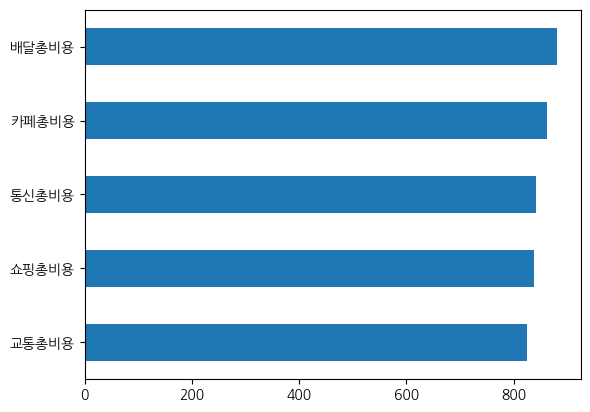

In [28]:
import koreanize_matplotlib

fi = pd.Series(clf.best_estimator_.feature_importances_)
fi.index = clf.best_estimator_.feature_name_
fi.nlargest(5).sort_values().plot.barh()

모델 성능 높이기 위해서 해볼 것
- 데이터 수 늘리기 -> 완료
- 모델 바꾸기
- 변수 추가 혹은 제거하기
- 하이퍼파라미터 조정 -> automl pycaret
- 위 선택지가 다 안 된다면.. card 데이터를 랜덤 말고 머신러닝 돌려서 넣어보기..

모델 저장 후 새로운 데이터를 모델에 적용해서 결과 예측하기
결과가 나오면 card 군집 중에서 그 사람 특성에 맞게 카드 순위 출력하기 + 유사도 반영 -> 일요일

streamlit으로 웹 페이지 만들기 -> 일요일 밤~

In [29]:
# 모델 저장
import pickle
with open('best_model.pickle','wb') as fw:
    pickle.dump(clf, fw)